In [2]:
import enviroment
import pacman
import matplotlib.pyplot as plt

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [3]:
maze, initial_position, goal_position = enviroment.getMazeTest()
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (5, 1)
Goal position: (23, 22)


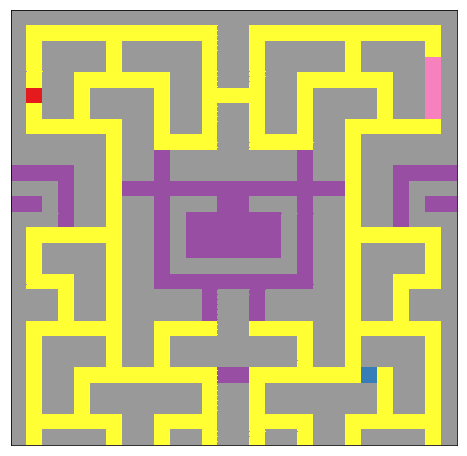

In [4]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_int_grid(initial_position, goal_position), cmap="Set1")
plt.show()

In [5]:
problem = pacman.Problem(maze, initial_position, goal_position)

# Breadth First Search - BFS

In [6]:
node, expanded_nodes, food_nodes = pacman.breadth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

Number of expanded nodes:
280
Number of expanded food nodes:
203
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>]
Path:
[<Node 

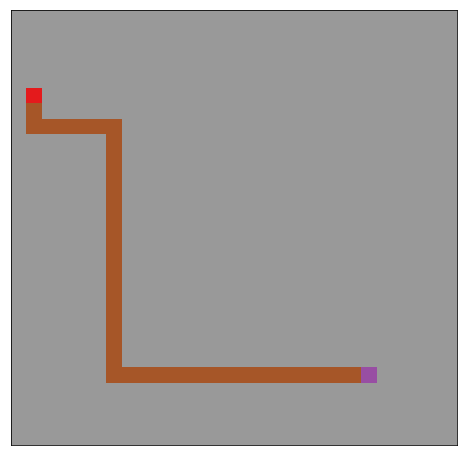

In [7]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# Depth First Search - DFS

In [ ]:
node, expanded_nodes, food_nodes = pacman.depth_first_graph_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

In [ ]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()

# Greedy Search - Manhattan Distance

In [ ]:
node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem)
print("Number of expanded nodes:")
print(expanded_nodes)
print("Number of expanded food nodes:")
print(food_nodes)
print(node.solution())
print("Path:")
print(node.path())

In [ ]:
plt.figure(figsize=(8, 8))
plt.xticks([]) 
plt.yticks([]) 
plt.gca().invert_yaxis()
plt.pcolormesh(maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()]), cmap="Set1")
plt.show()